In [91]:
#Powered by Vasily Isaev
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [92]:
#determe read quality in fastq-file
def char_qual(char):
    if ord(char) > 70: # '70' selected experimentally, main thing that B was defind as bad read
        return 1
    return 0
#simple test:
#print (char_qual('!'), char_qual('+'), char_qual('E'),char_qual('n'),char_qual('n'), char_qual('~'))

In [93]:
#determe read quality in fastq-file
def seq_qual(seq):
    good_qual = 0
    bad_qual = 0
    for char in seq:
        if char_qual(char):
            good_qual += 1
        else:
            bad_qual += 1
    # '0.7' selected experimentally, + 0.0001 to avoid division by zero in a reasonable time( without if)
    if good_qual / (bad_qual + 0.0001) > 0.7:       
        return 1
    return 0
#simple test:
#print(seq_qual('BBBBB'), seq_qual('aaa'), seq_qual('aaaaBBB'), seq_qual('aaaaBBBB'))

0 1 1 1


In [105]:
#number of letters in sequence
def num_char_in_seq(char_list, seq):
    total_amount = 0
    for char in seq:
        if char in char_list and char_qual(char): # consider if char well read
            total_amount += 1
    return total_amount
#simple test
#print( num_char_in_seq(['a','b'], 'abcdeba'), num_char_in_seq([], 'abcd'), num_char_in_seq(['a','a'],'abca'))

4 0 2


In [108]:
#simple func to count percentage of letters in sequencs
def percentage(char_list, seq):
    return num_char_in_seq(char_list, seq) / len(seq)
#simple test
#print( percentage(['a','b'], 'abcdeba'), percentage([], 'abcd'), percentage(['a','a'],'abca'))
#out: 4/7 0 1/2

0.5714285714285714 0.0 0.5


In [114]:
#get file name, return data in list format to build a hystagram of GC-content
def GC_content_data(file_name):
    
    target_nucleotides = ['G', 'C']
    fastq_file = open(file_name, 'r')
    
    hystagram_data = []
    cur_str_num = -1
    
    for tmp_string in fastq_file:
        if cur_str_num % 4 == 0 and (seq_qual(tmp_string)): #this construction for enumeration just reads
            hystagram_data.append(percentage(target_nucleotides, tmp_string))
        cur_str_num += 1
    
    fastq_file.close()
    return hystagram_data
#simple test
#print(GC_content_data('test.fastq'))

In [116]:
#get file name, return data in list format to build a hystagram of errors depends of erreor's place
def err_content_data(file_name):
    
    fastq_file = open(file_name, 'r')
    
    err_data = []
    num_chars = []
    
    cur_str_num = 1
    for tmp_string in fastq_file:
        if cur_str_num % 4 == 0: #this construction for enumeration just string that contains quality
            
            for i in range(len(tmp_string)): # err_data[i] -  sum of all qualities at position [i]
                if(len(err_data) <= i):
                    err_data.append(ord(tmp_string[i]))
                else:
                    err_data[i] += ord(tmp_string[i])
                    
                if(len(num_chars) <= i): # num_chairs[i] - sum of amount of reads contains place [i]
                    num_chars.append(1)
                else:
                    num_chars[i] += i
        cur_str_num += 1
        
        data = [] # contains final answer
    for i in range(len(err_data)):
        data.append(num_chars[i] / err_data[i]) # err_data[i] can't be 0, because min quality = 33        
    
    fastq_file.close()            
    
    return data
#simple test:
#print(err_content_data('test.fastq'))

(array([1., 1., 1., 1., 0., 1., 1., 1., 0., 2.]),
 array([0.04950495, 0.06831683, 0.08712871, 0.10594059, 0.12475248,
        0.14356436, 0.16237624, 0.18118812, 0.2       , 0.21881188,
        0.23762376]),
 <a list of 10 Patch objects>)

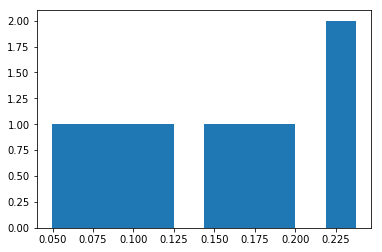

In [98]:
plt.hist(GC_content_data("test.fastq"))

Графики выглядят похоже
<img src = "gc_1.png">

<title>Графики похожи</title>
<img source = "GC_test1_fastq.png">

(array([ 7., 10., 39., 56., 63., 35., 11.,  7.,  3.,  1.]),
 array([0.12871287, 0.15938997, 0.19006707, 0.22074417, 0.25142127,
        0.28209837, 0.31277547, 0.34345257, 0.37412967, 0.40480677,
        0.43548387]),
 <a list of 10 Patch objects>)

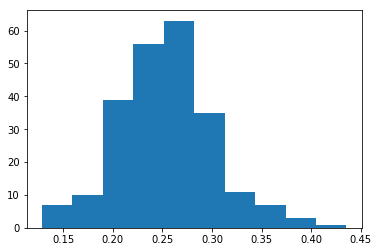

In [99]:
plt.hist(GC_content_data("test3.fastq"))

Графики похожи
<img src="gc_2.png">

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        1.4000e+01, 3.4000e+01, 7.1000e+01, 1.7600e+02, 2.3900e+02,
        2.9300e+02, 4.3100e+02, 6.2900e+02, 8.2500e+02, 1.0490e+03,
        1.4040e+03, 1.9250e+03, 2.8720e+03, 4.1690e+03, 6.0480e+03,
        8.7400e+03, 1.2641e+04, 1.7562e+04, 2.3213e+04, 3.0223e+04,
        3.8271e+04, 4.7566e+04, 5.6983e+04, 6.5683e+04, 7.3950e+04,
        8.1234e+04, 8.7093e+04, 9.0334e+04, 9.2799e+04, 9.3052e+04,
        9.1534e+04, 8.7565e+04, 8.2462e+04, 7.5833e+04, 6.9023e+04,
        6.2041e+04, 5.4161e+04, 4.6561e+04, 3.9478e+04, 3.3080e+04,
        2.7277e+04, 2.2340e+04, 1.7912e+04, 1.4537e+04, 1.1441e+04,
        8.9580e+03, 7.1150e+03, 5.4150e+03, 4.1110e+03, 3.3380e+03,
        2.6320e+03, 2.0080e+03, 1.5920e+03, 1.2710e+03, 1.0000e+03,
        7.4100e+02, 5.7200e+02, 4.4700e+02, 3.4200e+02, 3.0400e+02,
        2.1900e+02, 1.8900e+02, 1.3400e+02, 1.18

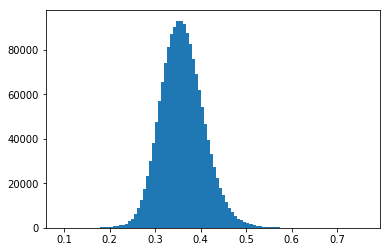

In [101]:
plt.hist(GC_content_data("frag.R1.fastq"), bins = 100)

Графики похожи
<img src="gc_3.png">

(array([1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 3.00000e+00,
        4.00000e+00, 1.20000e+01, 7.00000e+00, 5.00000e+00, 1.70000e+01,
        1.00000e+01, 1.30000e+01, 3.60000e+01, 3.70000e+01, 5.70000e+01,
        2.31000e+02, 2.04000e+02, 2.98000e+02, 1.07600e+03, 7.50000e+02,
        9.91000e+02, 3.25900e+03, 2.76700e+03, 4.03300e+03, 1.40000e+04,
        1.17330e+04, 1.61410e+04, 4.98110e+04, 3.59150e+04, 4.43020e+04,
        1.14538e+05, 6.96000e+04, 7.63160e+04, 1.68224e+05, 8.83620e+04,
        8.86800e+04, 1.71914e+05, 8.00740e+04, 7.44440e+04, 1.29938e+05,
        5.47360e+04, 4.79080e+04, 7.71870e+04, 3.01560e+04, 2.54700e+04,
        3.81910e+04, 1.41840e+04, 1.15180e+04, 1.69050e+04, 6.14300e+03,
        4.88300e+03, 7.06300e+03, 2.55900e+03, 2.07800e+03, 3.01200e+03,
        1.08000e+03, 8.21000e+02, 1.17400e+03, 4.65000e+02, 3.69000e+02,
        5.31000e+02, 1.68000e+02, 1.70000e+02, 2.25000e+02, 7.80000e+01,
        9.20000e+01, 1.18000e+02, 4.40000e+01, 2.80

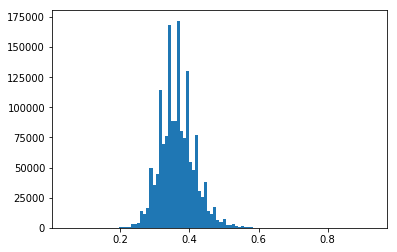

In [100]:
plt.hist(GC_content_data("frag.R2.fastq"), bins = 100)

Графики похожи, но при всех значениях для порога качества послежовательностей [50 .. 99]% удовлетворительных результатов не получено
<img src="gc_4.png">

(array([69., 31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.68350168e-03, 8.91515152e-01, 1.78134680e+00, 2.67117845e+00,
        3.56101010e+00, 4.45084175e+00, 5.34067340e+00, 6.23050505e+00,
        7.12033670e+00, 8.01016835e+00, 8.90000000e+00]),
 <a list of 10 Patch objects>)

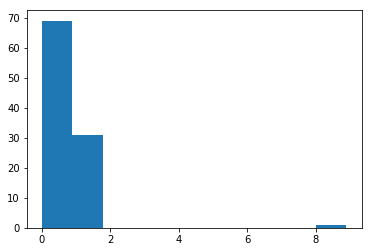

In [73]:
plt.hist(errcontent_data("test.fastq"))

Графики похожи
<img src="qual_1.png">

(array([69., 31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([5.63126478e-05, 9.93537523e-01, 1.98701873e+00, 2.98049995e+00,
        3.97398116e+00, 4.96746237e+00, 5.96094358e+00, 6.95442479e+00,
        7.94790600e+00, 8.94138721e+00, 9.93486842e+00]),
 <a list of 10 Patch objects>)

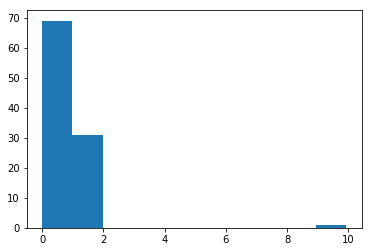

In [74]:
plt.hist(errcontent_data("test3.fastq"))

Графики похожи
<img src="qual_2.png">

(array([16., 15., 13., 14., 13., 13., 11., 10.,  9.,  7.,  7.,  6.,  6.,
         5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([6.06493834e-09, 1.49999919e-01, 2.99999832e-01, 4.49999745e-01,
        5.99999659e-01, 7.49999572e-01, 8.99999485e-01, 1.04999940e+00,
        1.19999931e+00, 1.34999922e+00, 1.49999914e+00, 1.64999905e+00,
        1.79999896e+00, 1.94999888e+00, 2.09999879e+00, 2.24999870e+00,
        2.39999862e+00, 2.54999853e+00, 2.69999844e+00, 2.84999836e+00,
        2.99999827e+00, 3.14999818e+00, 3.29999809e+00, 3.44999801e+00,
  

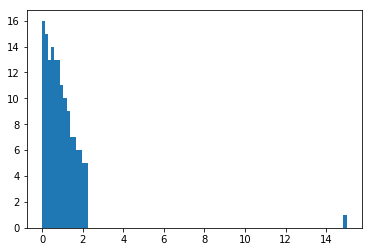

In [75]:
plt.hist(errcontent_data("frag.R1.fastq") , bins = 100)

Графики похожи
<img src="qual_3.png">

(array([16., 14., 13., 13., 11., 11.,  8.,  8.,  8.,  6.,  7.,  8.,  8.,
         8., 10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([6.09949485e-09, 1.49999919e-01, 2.99999832e-01, 4.49999745e-01,
        5.99999659e-01, 7.49999572e-01, 8.99999485e-01, 1.04999940e+00,
        1.19999931e+00, 1.34999922e+00, 1.49999914e+00, 1.64999905e+00,
        1.79999896e+00, 1.94999888e+00, 2.09999879e+00, 2.24999870e+00,
        2.39999862e+00, 2.54999853e+00, 2.69999844e+00, 2.84999836e+00,
        2.99999827e+00, 3.14999818e+00, 3.29999809e+00, 3.44999801e+00,
  

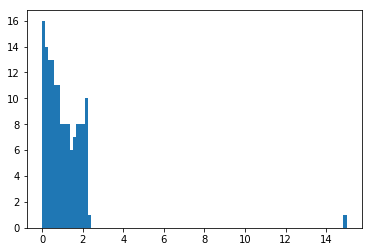

In [76]:
plt.hist(errcontent_data("frag.R2.fastq"), bins = 100)

Графики похожи
<img src="qual_4.png">

Выводы:
Построенные написанным мной алгоритмом графики аналогичны графикам, которые строит Fastqc, за исключением графика GCcontetn для frag.R2.fastq. Для улучшения этого графика нужно использовать дополнительные методы для отбора качественных данных.